# KNN

In [15]:
import numpy as np
import pandas as pd
import time
from scipy.spatial.distance import euclidean
from scipy import stats
from matplotlib import pyplot as plt

## Roadmap
1. Calculate all distancies between known and unknown points
2. Predict class of unknown point by the k nearest neighbours



In [16]:
def calc_all_distancies(data_x, unknown):
    '''
        Function calculates distancies between each pairs of known and unknown points
    '''
    num_pred = unknown.shape[0]
    num_data = data_x.shape[0]
    dists = np.zeros((num_pred,num_data))
    for i in range(num_pred):
        for j in range(num_data):
            dists[i,j] = euclidean(unknown[i],data_x[j])
    return dists

In [17]:
def predict(dists, data_y, k):
    '''
        Function predicts the class of the unknown point by the k nearest neighbours
    '''
    num_pred = dists.shape[0]
    y_pred = np.zeros(num_pred)
    for j in range(num_pred):
        dst = dists[j]
        closest_y = data_y[dst.argsort()[:k]]
        #import pdb;pdb.set_trace()
        y_pred[j] = stats.mode(closest_y, axis=None).mode
    return y_pred

In [18]:
#print(dists[j])
#print(dst.argsort()[:3])
'''nt(X[:5])
    print("------------")
    print(X[np.argsort(X[:5,1])])
    print(stats.mode(X, axis = None))
    print(stats.mode(Y, axis = None).mode[0])'''


'nt(X[:5])\n    print("------------")\n    print(X[np.argsort(X[:5,1])])\n    print(stats.mode(X, axis = None))\n    print(stats.mode(Y, axis = None).mode[0])'

In [27]:
def accuracy(predicted,real):
    '''
        Calculates accuracy percentage
    '''
    total = len(real)
    s = sum(real == predicted)
    return 100*s/total

In [28]:
def compare_k(data_x, data_y, test_x, test_y, kmin=1, kmax=50, kstep=4):
    '''
        Main comparing function
    '''
    k = list(range(kmin, kmax, kstep))
    steps = len(k)
    features = np.zeros((steps,3))
    
    print('Evaluating distancies started')
    
    t0 = time.time()
    distancies = calc_all_distancies(data_x,test_x)
    miss = []
    t = time.time()
    s1 = data_x.shape[0]
    s2 = test_x.shape[0]
    
    print('Distancies completed in %d seconds for %dx%d' %(t-t0,s1,s2))
    
    for j in range(steps):
        t0 = time.time()
        yk = predict(distancies,data_y,k[j])
        t = time.time() - t0
        features[j][0] = k[j]
        features[j][1] = accuracy(yk,test_y)
        features[j][2] = t
        cond = yk!=test_y
        miss.append({
            'k':k[j],
            'acc':features[j][1],
            'x':test_x[cond]}
        )
        
        print('k={0}, accuracy = {1}%, time = {2} sec'.format(k[j],features[j][1],features[j][2]))
        
    return features, miss

In [29]:
print(Y)

[[ 152.  179.  223.    1.]
 [  80.   92.  132.    1.]
 [  70.   81.  119.    1.]
 ..., 
 [  70.   80.  120.    1.]
 [ 201.  209.  249.    1.]
 [ 206.  218.  254.    1.]]


In [30]:
def loadTxt(filename):
    # Numpy function to generate array from txt or csv
    return  np.genfromtxt(filename, delimiter='\t')

In [31]:
points = loadTxt('Skin_NonSkin.txt')


print(points)

[[  74.   85.  123.    1.]
 [  73.   84.  122.    1.]
 [  72.   83.  121.    1.]
 ..., 
 [ 163.  162.  112.    2.]
 [ 163.  162.  112.    2.]
 [ 255.  255.  255.    2.]]


## Select some part of data to be tested

In [32]:
##just for develop mode  - use limited amout of data rows
number_of_rows = 735 ##3% of all data - at least my laptop will not die
points = points[:int(number_of_rows)]

print(points.shape)
ratio = 0.67 
l = len(points)
n = int(l*ratio)
ind = np.random.permutation(l)

X=points[ind]
Y=points[ind]

x_trn = X[:n]
x_trn = x_trn[:, range(0, 3)]
y_trn = Y[:n]
y_trn = y_trn[:,-1]
x_tst = X[n:]
x_tst = x_tst[:, range(0, 3)]
y_tst = Y[n:]
y_tst = y_tst[:,-1]


(735, 4)


In [33]:
print(x_trn.shape)
print(x_tst.shape)

(492, 3)
(243, 3)


## Calculate distancies & compare result for different k

In [34]:
res, ms = compare_k(x_trn, y_trn, x_tst, y_tst,1,201,20)

Evaluating distancies started
Distancies completed in 6 seconds for 492x243
k=1, accuracy = 100.0%, time = 0.05700254440307617 sec
k=21, accuracy = 100.0%, time = 0.05800199508666992 sec
k=41, accuracy = 100.0%, time = 0.09350323677062988 sec
k=61, accuracy = 100.0%, time = 0.12850379943847656 sec
k=81, accuracy = 100.0%, time = 0.08500409126281738 sec
k=101, accuracy = 100.0%, time = 0.05600333213806152 sec
k=121, accuracy = 100.0%, time = 0.047002553939819336 sec
k=141, accuracy = 100.0%, time = 0.05000162124633789 sec
k=161, accuracy = 100.0%, time = 0.05450272560119629 sec
k=181, accuracy = 100.0%, time = 0.06100273132324219 sec


## Visualisation

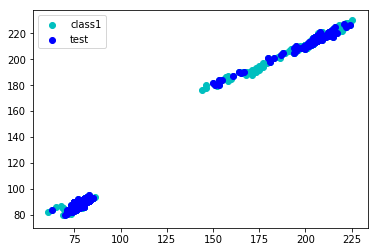

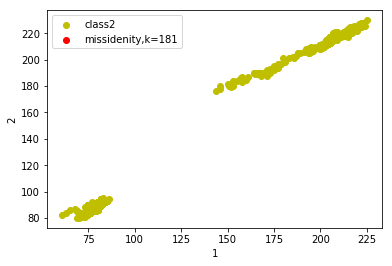

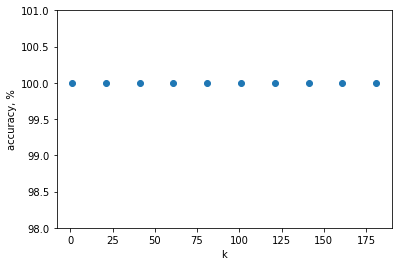

In [35]:
# initial data
fig = plt.figure()
plt.scatter(X[:, 0], X[:, 1], color='c',label='class1')
# randomly selected data
plt.scatter(x_tst[:,0],x_tst[:,1],color='b',label='test')
plt.legend(loc='best')


# missidentifies for k = value
plt.figure()
plt.scatter(X[:, 0], X[:, 1], color='y', label='class2')
plt.scatter(ms[-1]['x'][:,0],ms[-1]['x'][:,1],color='r',label='missidenity,k=%d'%ms[-1]['k'])
plt.legend(loc='best')
plt.xlabel('1')
plt.ylabel('2')
plt.figure()

# accuracy plot
k = plt.scatter(res[:, 0], res[:, 1])
plt.ylim(min(res[:, 1]) - 2, max(res[:, 1])+1, 4)
plt.xlabel('k')
plt.ylabel('accuracy, %')
plt.show()